"TITLE"
Classification of date fruit type based on their morphological features

"INTRODUCTION"
The date fruit (Phoenix dactylifera) has over 2500 species globally, and it can be categorized into around 200 types. Worldwide, the variety of date fruits are often used in food, medicine, and cosmetics. For our assignment, we took the dataset from a study titled “ Classification of Date Fruits into Genetic Varieties Using Image Analysis,” published by Koklu, M., Kursun, R., Taspinar., Y.S., and Cinar, I. in 2021. 

The main features of this dataset include morphological features (i.e. Area, Perimeter, Major axis, Minor axis,…), Shape features (i.e. shapefactor_1, Shapefactor_2,…), and Color features(i.e. Mean RR, Std. dev RR, Skey RR,…). There are 7 date types in the dataset which are Barhee from the Palestinian region, Deglet Nour from Algeria region, Sukkary, Ruthana, Safawi, and Sagai from Saudi Arabia, and Rotab Mozafati from the Iran region.

The question for our project is: Using the morphological feature variables, can the type of date fruit be predicted using classification modelling?


PRELIMINARY EXPLORATORY DATA ANALYSIS:

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

- READING THE DATASET : 
To read this dataset, we uploaded to the dataset to a google drive with open access so that we could directly read this dataset using the read_csv function. 

In [6]:
date_fruit_full_data <- read_csv("https://drive.google.com/uc?export=download&id=1jPdbQ6nzKO8h9KTi7R6VKyExp2o7Ry5P")

Rows: 898 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (34): AREA, PERIMETER, MAJOR_AXIS, MINOR_AXIS, ECCENTRICITY, EQDIASQ, SO...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SELECTING NECESSARY COLUMNS :
- Now, we use the select function to select the specific columns that we will be using for our overall data analysis.
- We have chosen "Class", "AREA", "PERIMETER", "CONVEX_AREA", "MAJOR_AXIS", and "MINOR_AXIS" as they seem to be relevant features that are important for the prediction of the Class. 


In [7]:
date_fruit_data <- select(date_fruit_full_data, "Class", "AREA", "PERIMETER", "CONVEX_AREA", "MAJOR_AXIS", "MINOR_AXIS")

SPLITTING THE DATASET INTO TRAINING AND TESTING DATA :
- This code below splits the data into training and testing sets using a 75%-25% split as mentioned in the "prop" argument. It stratifies the split by the "Class" column to ensure that each class is represented proportionally in both training and test sets.
- This is done to prepare the data for futher modeling, where the model is trained on one dataset and tested on another one to evaluate its perfomance. For now, we will be using the training data for further analysis and for plotting and making relevant tables. 

In [8]:
date_fruit_split <- initial_split(date_fruit_data, prop = 0.75, strata = Class)
date_fruit_train <- training(date_fruit_split)
date_fruit_test <- testing(date_fruit_split)

date_fruit_train

Class,AREA,PERIMETER,CONVEX_AREA,MAJOR_AXIS,MINOR_AXIS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BERHI,398901,2299.335,400295,812.7031,628.3113
BERHI,342155,2151.896,345474,760.6585,575.3604
BERHI,408220,2317.669,411229,769.1027,681.1285
BERHI,306560,2015.198,308043,715.4261,547.1210
BERHI,354590,2181.739,356244,772.2312,587.4540
BERHI,342514,2154.021,345541,764.3176,573.2928
BERHI,409607,2351.354,413253,835.5469,627.9048
BERHI,442845,2422.366,445459,836.9063,677.0573
BERHI,383504,2288.917,387106,784.1191,626.8956


SUMMARIZING THE TRAINING DATA :
- Now, we use group_by() and summarize() functions together to calculate mean values for several physical charateristics that we selected earlier.
- This helps us to understand the average physical properties of each fruit date class, which further would help us provide insights for exploratory data analysis.

In [12]:
date_fruit_mean <- date_fruit_train |> 
group_by(Class) |> 
summarize(
    mean_area = mean(AREA),
    mean_perimeter = mean(PERIMETER),
    mean_convex_area = mean(CONVEX_AREA),
    mean_major = mean(MAJOR_AXIS),
    mean_minor = mean(MINOR_AXIS))

date_fruit_mean

Class,mean_area,mean_perimeter,mean_convex_area,mean_major,mean_minor
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BERHI,400910.8,2309.225,403390.6,808.7219,633.2127
DEGLET,236257.3,1838.117,239708.5,681.7998,442.9936
DOKOL,148186.6,1452.490,150182.2,544.6832,346.0871
IRAQI,438357.6,2420.958,441397.0,838.6784,668.8962
ROTANA,387011.3,2380.616,394831.7,835.5188,597.6000
SAFAVI,336499.5,2337.211,345659.4,884.9437,489.7638
SOGAY,287282.0,2055.030,295595.5,757.3249,491.8489


VISUALIZATION DIFFERENT RELATIONSHIPS USING PLOTS :
- We first chose the two columns perimeter and area and plotted them using geom_point() as shown below. This shows a relationship between Perimeter and Area, with different classes shown by different color.
- This shows that the k-nn classifier algorithm will work on this dataset for predicting the date fruit type. 

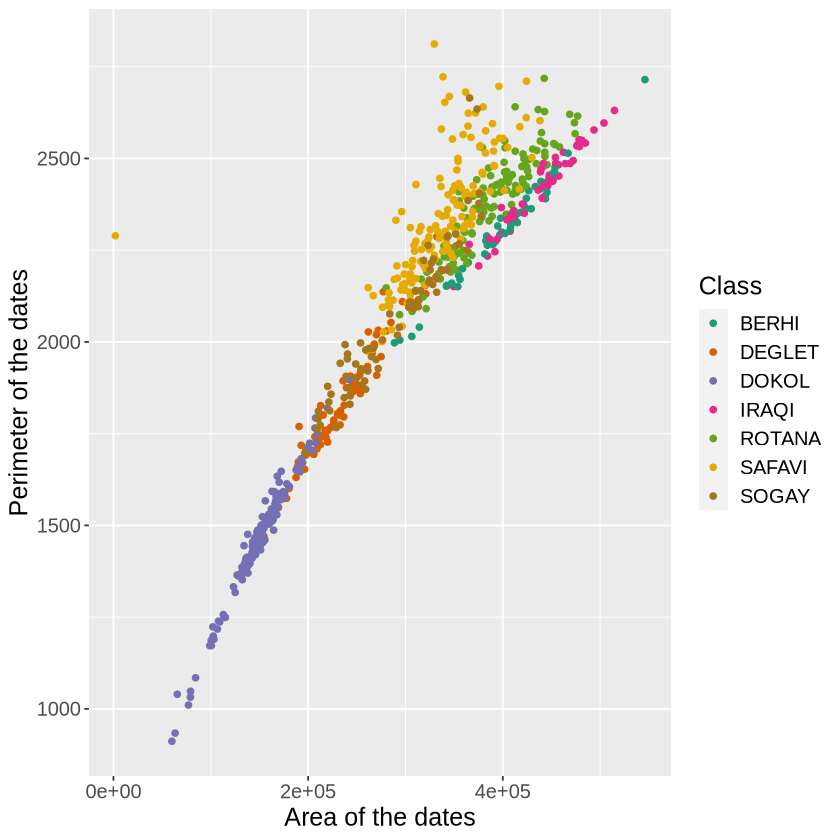

In [13]:
library(scales)

perimeter_vs_area <- ggplot(date_fruit_train, aes(x = AREA,
                     y = PERIMETER,
                     color = Class)) +
  geom_point() +
  xlab("Area of the dates") +
  ylab("Perimeter of the dates") +
  theme(text = element_text(size = 15),
        legend.direction = "vertical") +
  scale_color_brewer(palette = "Dark2") 

perimeter_vs_area

- Now, we visualize a scatter plot between Major and Minor Axis which is also colored by class.

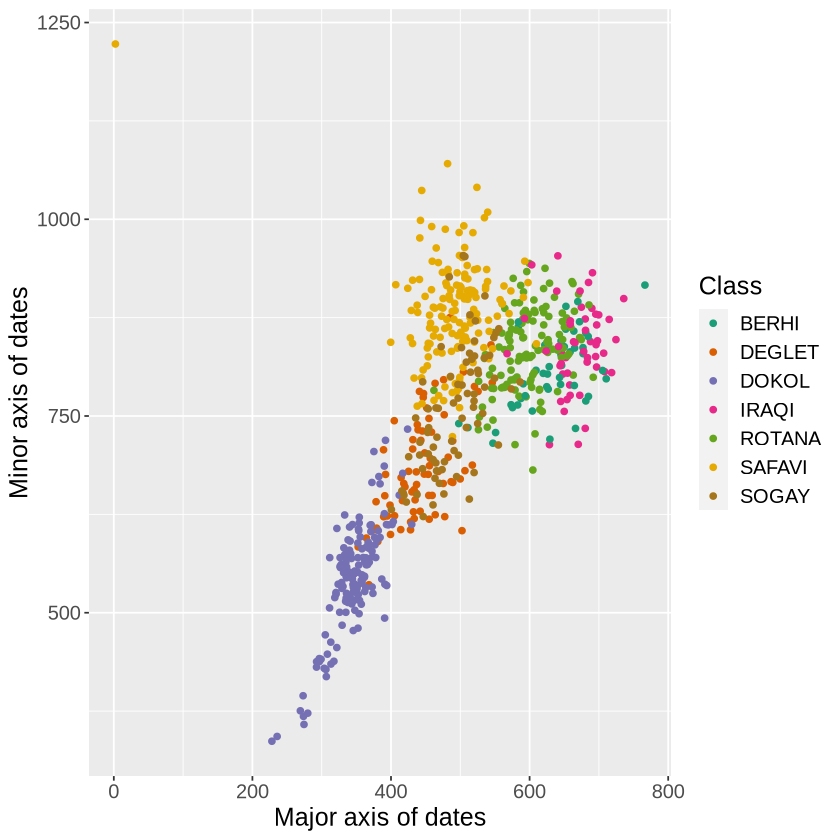

In [15]:
major_vs_minor <- ggplot(date_fruit_train, aes(x = MINOR_AXIS,y = MAJOR_AXIS,color = Class)) +
                  geom_point() +
                  xlab("Major axis of dates") +
                  ylab("Minor axis of dates") +
                  theme(text = element_text(size = 15),
                        legend.direction = "vertical") +
                  scale_color_brewer(palette = "Dark2")

major_vs_minor

- METHODS

"EXPECTED OUTCOMES AND SIGNIFICANCE"
With the predictors our group selected for our predictive question, we should be able to successfully classify different types of date fruits into its correct type. The model we create will be able to assign a label to each example of date fruit in the data set, which implies the model’s prediction for the fruit’s type.

The model that we create could have impacts over many fields, it could be a fledgling stage for an automated sorting system used in the field of agriculture. An accurate predictive model can help farms to sort fruit types as they are harvested, it can efficiently classify the fruit types and reduce the cost of labor and time.

The investigation of the predictive model leads to future questions about binding farming practices and data science. We are interested in whether we could make more advanced predictions with the external features of the fruits and predict the it's quality. Furthermore, we are inquisitive about the p[ossibility of the realization of a fully automated harvesting and sorting system by combining AI and an advanced classification model. 
